<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-4-Warp-Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IcBrgcx8NP85gYg5XrhPhr12GgGDPweu' -O elephant2.png


--2024-09-12 01:45:38--  https://docs.google.com/uc?export=download&id=1IcBrgcx8NP85gYg5XrhPhr12GgGDPweu
Resolving docs.google.com (docs.google.com)... 172.253.115.113, 172.253.115.139, 172.253.115.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IcBrgcx8NP85gYg5XrhPhr12GgGDPweu&export=download [following]
--2024-09-12 01:45:38--  https://drive.usercontent.google.com/download?id=1IcBrgcx8NP85gYg5XrhPhr12GgGDPweu&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 843231 (823K) [image/png]
Saving to: ‘elephant2.png’

elephant2.png       100%[===================>] 823.47K  --.-KB/s    in 0.04s   


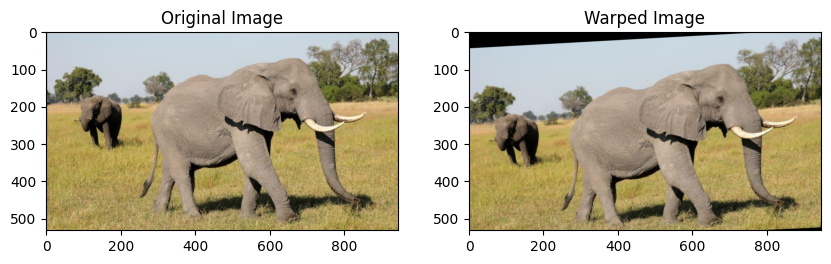

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './elephant2.png'
image = cv2.imread(image_path)

# Specify four points in the source image (corners of the area you want to warp)
rows, cols, ch = image.shape

# Example points for warp, you may need to adjust these based on your image.
src_points = np.float32([[50, 50], [cols - 50, 50], [50, rows - 50], [cols - 50, rows - 50]])

# Define the destination points (where you want to warp the image to)
dst_points = np.float32([[10, 100], [cols - 10, 50], [50, rows - 10], [cols - 50, rows - 50]])

# Compute the perspective transform matrix
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Perform the warp transformation
warped_image = cv2.warpPerspective(image, matrix, (cols, rows))

# Display the original and warped images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB)), plt.title('Warped Image')
plt.show()


Key Differences in this Example:
The src_points are now set at the extreme corners of the image.
The dst_points are set to more extreme positions, causing a stronger distortion and reshaping of the image.
For example, the top left corner of the image is moved to (cols * 0.2, rows * 0.33), and the bottom left corner is moved to (cols * 0.1, rows * 0.9), introducing a large distortion in the resulting image.

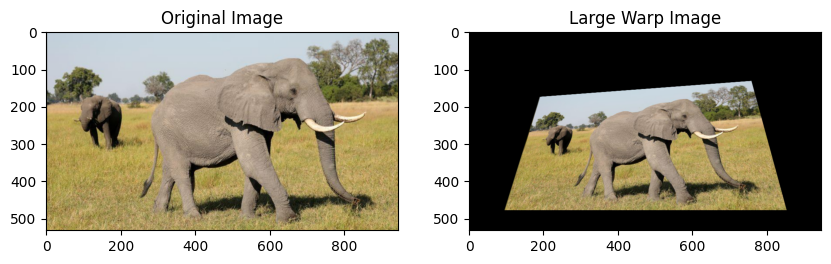

In [3]:
rows, cols, ch = image.shape

# Specify the source points (corners of the area you want to warp)
# Example points chosen from near the corners of the image
src_points = np.float32([[0, 0], [cols, 0], [0, rows], [cols, rows]])

# Define the destination points to create a large warp effect
dst_points = np.float32([[cols * 0.2, rows * 0.33], [cols * 0.8, rows * 0.25],
                         [cols * 0.1, rows * 0.9], [cols * 0.9, rows * 0.9]])

# Compute the perspective transform matrix
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Perform the warp transformation
warped_image = cv2.warpPerspective(image, matrix, (cols, rows))

# Display the original and warped images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB)), plt.title('Large Warp Image')
plt.show()